In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [3]:
df=pd.read_csv(r'C:\Users\Abhiraj Mandal\OneDrive\Desktop\Stock_Prediction\Stock-Price-Prediction\SBIN.csv')

In [4]:
# Load the dataset
#df = pd.read_csv('/content/SBIN.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-1996,18.691147,18.978922,18.540184,18.823240,12.409931,43733533.0
1,02-01-1996,18.894005,18.964767,17.738192,18.224106,12.014931,56167280.0
2,03-01-1996,18.327892,18.568489,17.643839,17.738192,11.694577,68296318.0
3,04-01-1996,17.502312,17.832542,17.223972,17.676863,11.654142,86073880.0
4,05-01-1996,17.738192,17.785366,17.459852,17.577793,11.588827,76613039.0


In [5]:
# Drop the 'Date' and 'Adj Close' columns
df.drop(['Date', 'Adj Close'], axis=1, inplace=True)

In [6]:
df.head()

,Open,High,Low,Close,Volume
0,18.691147,18.978922,18.540184,18.823240,43733533.0
1,18.894005,18.964767,17.738192,18.224106,56167280.0
2,18.327892,18.568489,17.643839,17.738192,68296318.0
3,17.502312,17.832542,17.223972,17.676863,86073880.0
4,17.738192,17.785366,17.459852,17.577793,76613039.0


In [7]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [8]:
# Select features and target variable
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [11]:
X_train.shape

(5659, 4)

In [12]:
X_test.shape

(1415, 4)

In [13]:
y_train.shape

(5659,)

In [14]:
y_test.shape

(1415,)

In [15]:
# Function to evaluate and print RMSE, MAE, and MAPE
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}\n")
    print(f"R2_Score: {r2}\n")
    return rmse, mae, mape,r2


In [16]:
metrics = {
    "Model": [],
    "RMSE": [],
    "MAE": [],
    "MAPE": [],
    "R2": [],
}

## 1. LINEAR REGRESSION

In [43]:
# Create a linear regression model
model1 = LinearRegression()

In [44]:
y_train.head()

5286    257.350006
3408    129.464996
5477    279.350006
6906    588.500000
530      21.644367
Name: Close, dtype: float64

In [45]:
# Train the model
model1.fit(X_train, y_train)

LinearRegression()

In [46]:

rmse, mae, mape,r2 = evaluate_model(model1, X_test_scaled, y_test)
metrics["Model"].append("Linear Regressor")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)
metrics['R2'].append(r2)

RMSE: 234.77989480270537
MAE: 176.52560636631702
MAPE: 0.9999434459009021

R2_Score: -1.2939949249565443



## 2. Support Vector Regression

In [49]:
# Create an SVR model
model2 = SVR()


In [18]:
# Train the model
model2=SVR()
model2.fit(X_train, y_train)

SVR()

In [20]:
rmse, mae, mape,r2 = evaluate_model(model2, X_test_scaled, y_test)
metrics["Model"].append("Linear Regressor")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)
metrics['R2'].append(r2)

RMSE: 155.09208188200955
MAE: 124.0643357754677
MAPE: 2.471521622294383

R2_Score: -0.00103646275140723



## 3. Random Forest Regressor

In [48]:
model3 = RandomForestRegressor()
params={'n_estimators':[20,30,40,50,100],'max_depth':[2,3,5,7,8]}
modelcv=RandomizedSearchCV(model3,param_distributions=params,cv=5,n_jobs=-1,n_iters=5,scoring='r2')
modelcv.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
model3=RandomForestRegressor()
model3.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
rmse, mae, mape,r2 = evaluate_model(model3, X_test_scaled, y_test)
metrics["Model"].append("Linear Regressor")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)
metrics['R2'].append(r2)

RMSE: 224.9257377950826
MAE: 162.98140525804317
MAPE: 0.7506869360692034

R2_Score: -1.1054694914595413



## 4. Gradient Boosting Models (GBM)

In [29]:
model4 = GradientBoostingRegressor()

In [30]:
# Train the model
model4.fit(X_train, y_train)

GradientBoostingRegressor()

In [31]:
rmse, mae, mape,r2= evaluate_model(model4, X_test_scaled, y_test)
metrics["Model"].append("GBM")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)
metrics['R2'].append(r2)

RMSE: 224.41069433522418
MAE: 162.2712281619757
MAPE: 0.7378541693598376

R2_Score: -1.095838163870536



## 5. Extreme Gradient Boosting (XGBoost)

In [32]:
import xgboost as xgb
# Create an XGBoost model
model5 = xgb.XGBRegressor()

In [33]:
# Train the model
model5.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
rmse, mae, mape,r2 = evaluate_model(model5, X_test_scaled, y_test)
metrics["Model"].append("XGBoost")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)
metrics['R2'].append(r2)


RMSE: 224.66436370022384
MAE: 162.62070643817412
MAPE: 0.7441437311249671

R2_Score: -1.1005790290149489



## 6. AdaBoostRegressor

In [35]:
model6 = AdaBoostRegressor()

In [36]:
# Train the model
model6.fit(X_train, y_train)

AdaBoostRegressor()

In [37]:
rmse, mae, mape,r2 = evaluate_model(model6, X_test_scaled, y_test)
metrics["Model"].append("AdaBoost Regressor")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)
metrics['R2'].append(r2)


RMSE: 211.9166931008408
MAE: 150.32589469762644
MAPE: 0.7047562838772767

R2_Score: -0.868964197590564



## 7. Decision Tree

In [38]:
model7 = DecisionTreeRegressor()

In [39]:
# Train the model
model7.fit(X_train, y_train)

DecisionTreeRegressor()

In [40]:
rmse, mae, mape,r2 = evaluate_model(model7, X_test_scaled, y_test)
metrics["Model"].append("Decision Tree")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)
metrics['R2'].append(r2)

RMSE: 224.85857555038172
MAE: 162.88870413804315
MAPE: 0.7490024715971244

R2_Score: -1.1042123036735525



## 8. KNeighborsRegressor(KNN)

In [50]:
# Create a KNN model
model8 = KNeighborsRegressor()

In [51]:
# Train the model
model8.fit(X_train, y_train)

KNeighborsRegressor()

In [43]:
rmse, mae, mape,r2 = evaluate_model(model8, X_test_scaled, y_test)
metrics["Model"].append("KNN")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)
metrics['R2'].append(r2)

RMSE: 224.35603706259303
MAE: 162.1962430618594
MAPE: 0.7365233640314862

R2_Score: -1.094817367173988



## 9. Artificial Neural Networks (ANN)

In [44]:
# Create an ANN model
model9 = Sequential()
model9.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model9.add(Dense(16, activation='relu'))
model9.add(Dense(1, activation='linear'))

c:\Users\Abhiraj Mandal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
# Compile the model
model9.compile(loss='mean_squared_error', optimizer='adam')

In [46]:
# Train the model
model9.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

In [47]:
rmse, mae, mape,r2 = evaluate_model(model9, X_test_scaled, y_test)
metrics["Model"].append("ANN")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)
metrics['R2'].append(r2)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE: 2.799456855939579
MAE: 1.7446880044838962
MAPE: 0.011872849169401763

R2_Score: 0.9996738493842167



(1415, 4)

## 10. LSTM(Long Short term Memory)

In [87]:
n_steps = 10  # number of time steps
n_samples_train = len(X_train_scaled) - n_steps + 1
X_train_reshaped = np.array([X_train_scaled[i:i+n_steps, :] for i in range(n_samples_train)])



n_samples_test = len(X_test_scaled) - n_steps + 1
X_test_reshaped = np.array([X_test_scaled[i:i+n_steps, :] for i in range(n_samples_test)])


In [89]:
# Create an LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, 4)))
model.add(Dense(1))


c:\Users\Abhiraj Mandal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [90]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


In [91]:
# Train the model
model.fit(X_train_reshaped, y_train[n_steps-1:], epochs=100, batch_size=32, verbose=0)

In [94]:

X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])
rmse, mae, mape,r2 = evaluate_model(model, X_test_scaled, y_test)
metrics["Model"].append("LSTM")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)
metrics['R2'].append(r2)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
RMSE: 234.76076977168194
MAE: 176.33414777812328
MAPE: 0.9938599327429765

R2_Score: -1.2936212052458234



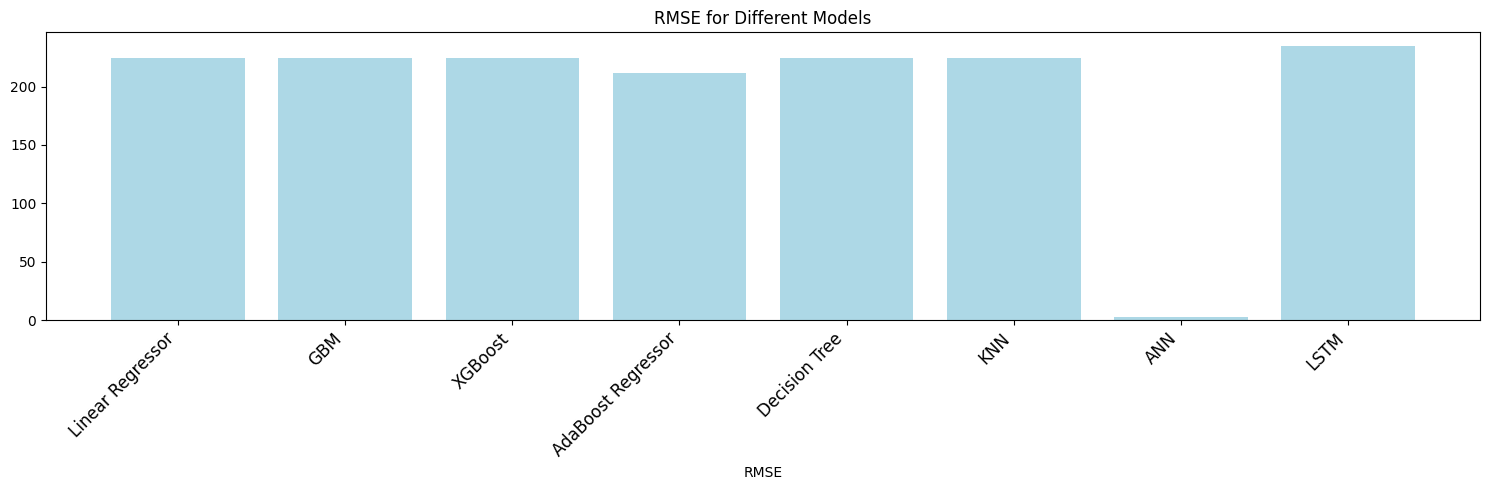

In [100]:
# Create a DataFrame for metrics
metrics_df = pd.DataFrame(metrics)

# Plot RMSE, MAE, and MAPE for each model
plt.figure(figsize=(15, 5))
plt.bar(metrics_df['Model'], metrics_df['RMSE'], color='lightblue')
plt.xlabel('RMSE')
plt.title('RMSE for Different Models')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

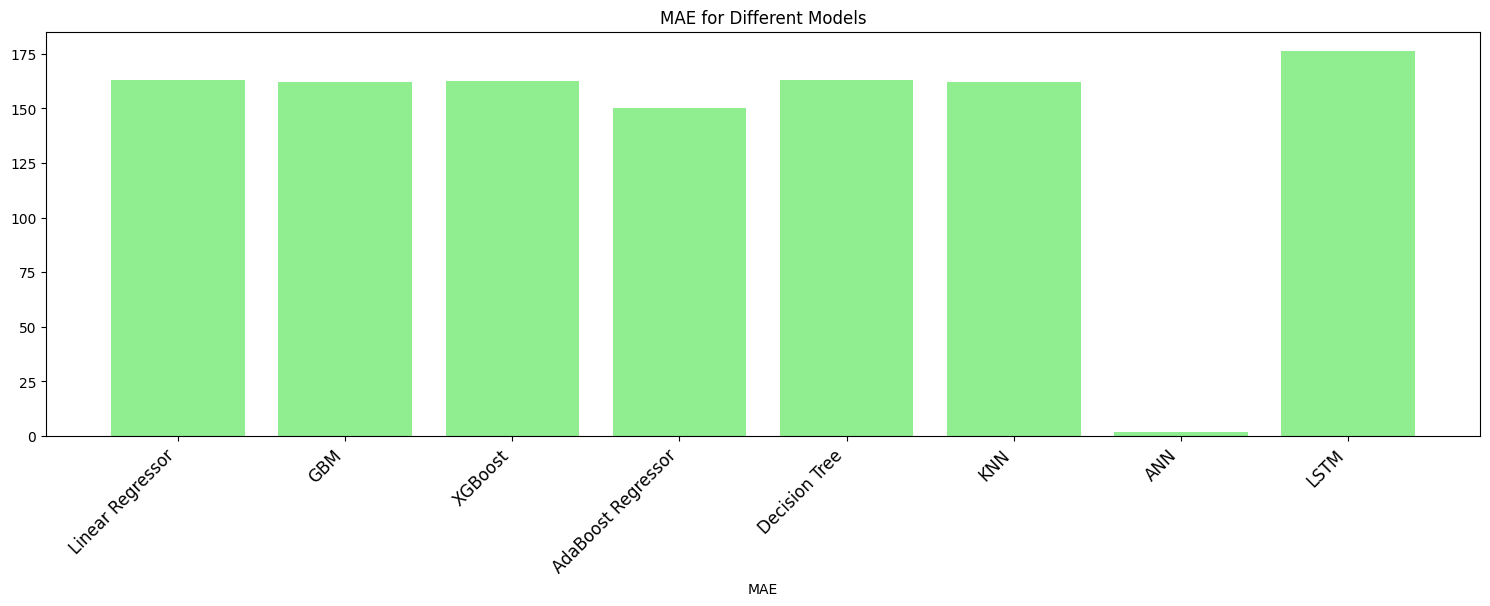

In [99]:
# MAE Plot

plt.figure(figsize=(15, 5))
plt.bar(metrics_df['Model'], metrics_df['MAE'], color='lightgreen')
plt.xlabel('MAE')
plt.title('MAE for Different Models')
plt.tight_layout()
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

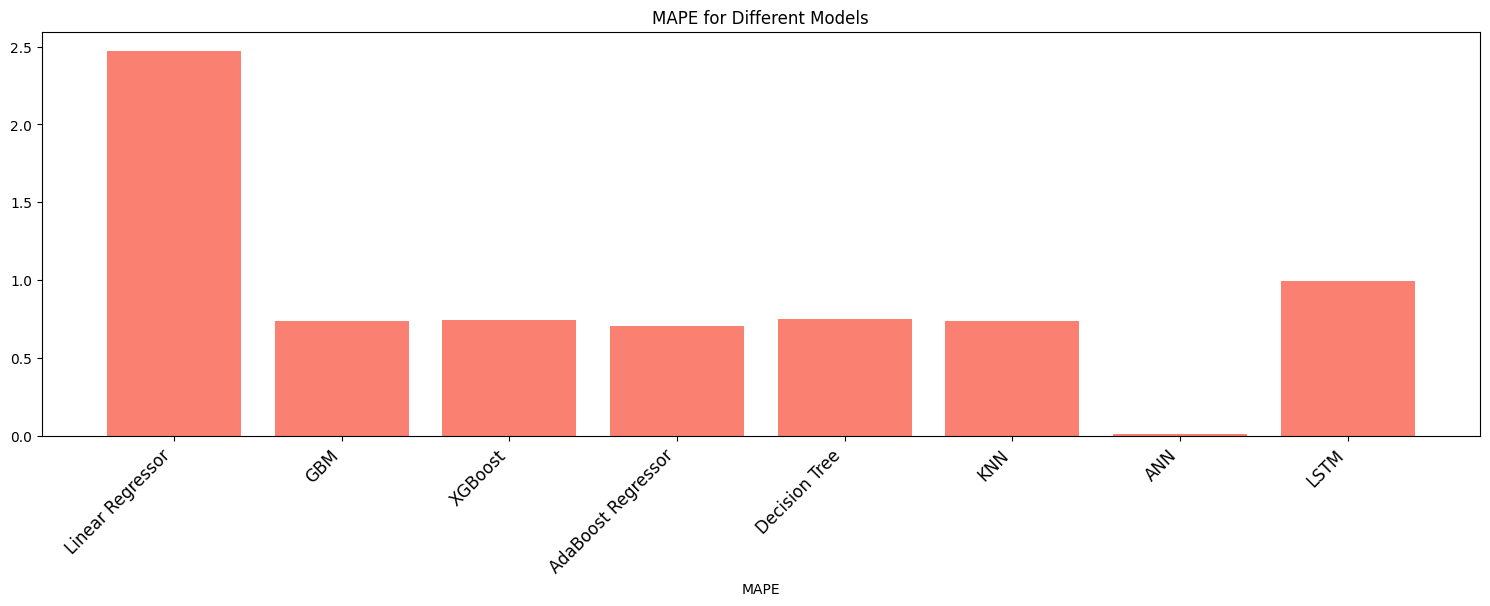

In [102]:

plt.figure(figsize=(15, 5))
plt.bar(metrics_df['Model'], metrics_df['MAPE'], color='salmon')
plt.xlabel('MAPE')
plt.title('MAPE for Different Models')
plt.tight_layout()
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

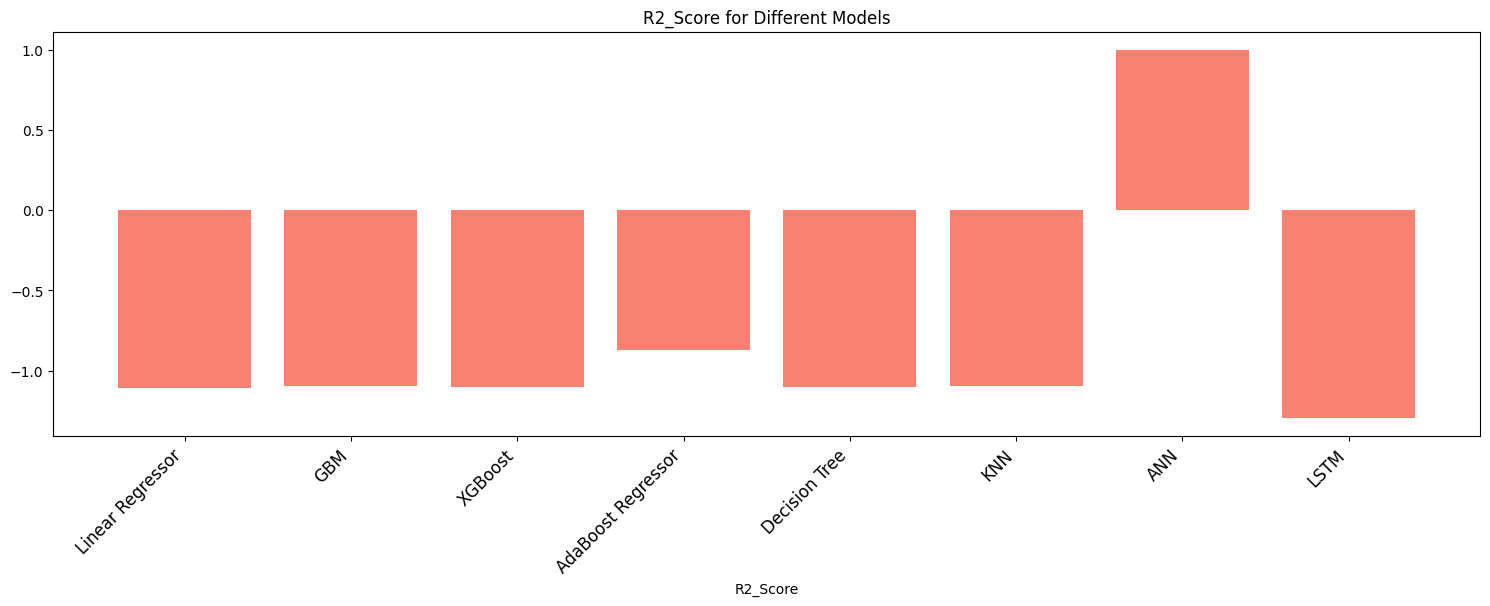

In [103]:

plt.figure(figsize=(15, 5))
plt.bar(metrics_df['Model'], metrics_df['R2'], color='salmon')
plt.xlabel('R2_Score')
plt.title('R2_Score for Different Models')
plt.tight_layout()
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()